# Data analysis

This notebook analyzes data collected from Angry Metal Guy.

The analysis includes:

- Distribution of genres and scores.

- Score distribution for the most-reviewed bands (bands with at least three reviews).

- Identification of the best and worst bands based on mean scores, considering only the most-reviewed bands.

## Importing packages

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_csv("../data/angrymetalguy_reviews_with_scores_clean.csv")
df.head()

,Band,Album,Genre,Score
0,(DOLCH),Feuer,Doom Metal,2.0
1,1000 Bone Cylinder Explosion,Bind,Black Metal,3.5
2,10:13,Result of an Iron Age,Black Metal,2.5
3,1349,Demonoir,Black Metal,4.0
4,1349,Massive Cauldron of Chaos,Black Metal,3.0


## Genre distribution

In [137]:
df['Genre'].value_counts()

Genre
Black Metal       1971
Death Metal       1850
Doom Metal         680
Heavy Metal        633
Power Metal        257
                  ... 
Southern Metal       1
Retro Metal          1
chiptunes            1
Cabaret Metal        1
Punk                 1
Name: count, Length: 85, dtype: int64

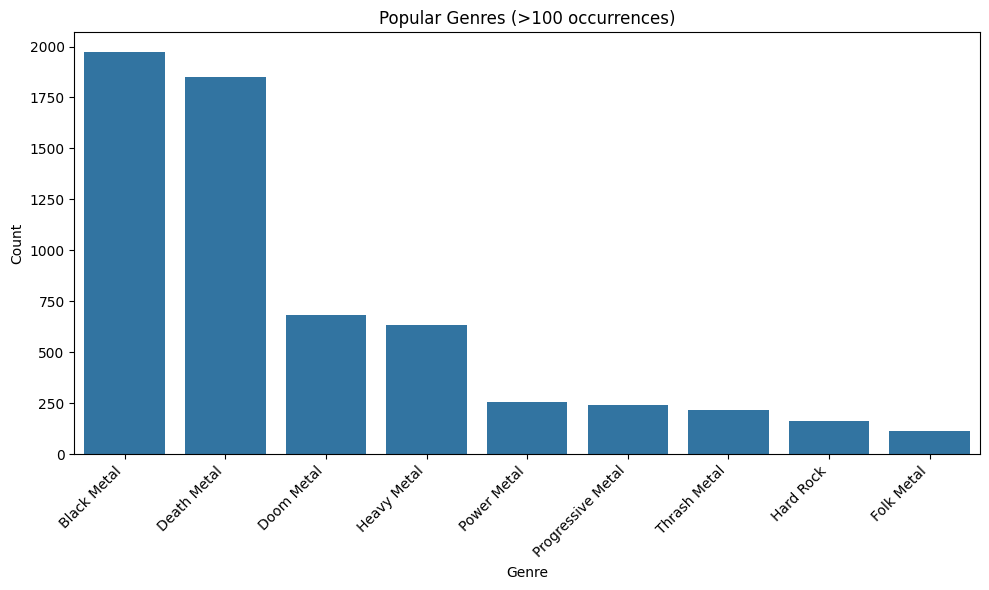

In [138]:
# Count popular genres (> 100 occurences)
genre_counts = df['Genre'].value_counts()
popular_genres = genre_counts[genre_counts > 100]

plt.figure(figsize=(10, 6))

# Barplot
sns.barplot(
    x=popular_genres.index,
    y=popular_genres.values,
    order=popular_genres.index
)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Popular Genres (>100 occurrences)")

plt.tight_layout()
plt.show()

The most popular genres, by far, are Black and Death Metal. 

## Scores distribution

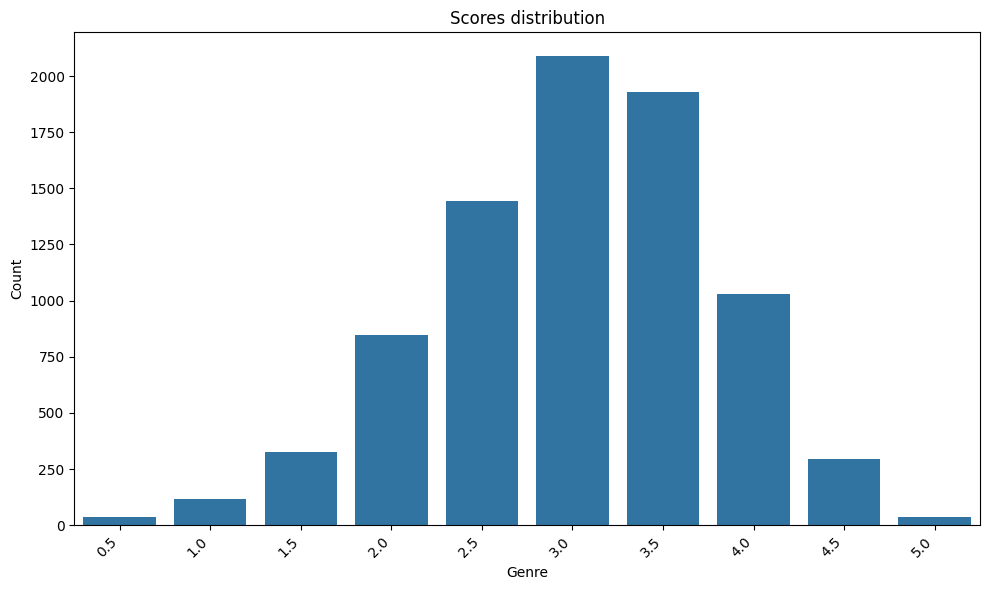

In [139]:
plt.figure(figsize=(10, 6))

# Barplot
sns.barplot(
    x=df['Score'].value_counts().index,
    y=df['Score'].value_counts().values
)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Scores distribution")

plt.tight_layout()
plt.show()

## Most reviewed bands

In [140]:
band_counts = df['Band'].value_counts()
most_reviewed_bands = band_counts[band_counts >= 3]

df_most_reviewed_bands = df[df['Band'].isin(most_reviewed_bands.index)]
df_most_reviewed_bands

,Band,Album,Genre,Score
3,1349,Demonoir,Black Metal,4.0
4,1349,Massive Cauldron of Chaos,Black Metal,3.0
5,1349,The Infernal Pathway,Black Metal,3.0
15,40 Watt Sun,Little Weight,Doom Metal,4.0
16,40 Watt Sun,The Inside Room,Doom Metal,4.0
...,...,...,...,...
8064,Yatra,Born into Chaos,Death Metal,2.5
8065,Yatra,Death Ritual,Doom Metal,2.5
8139,…and Oceans,"As in Gardens, So in Tombs",Black Metal,3.5
8140,…and Oceans,Cosmic World Mother,Black Metal,4.0


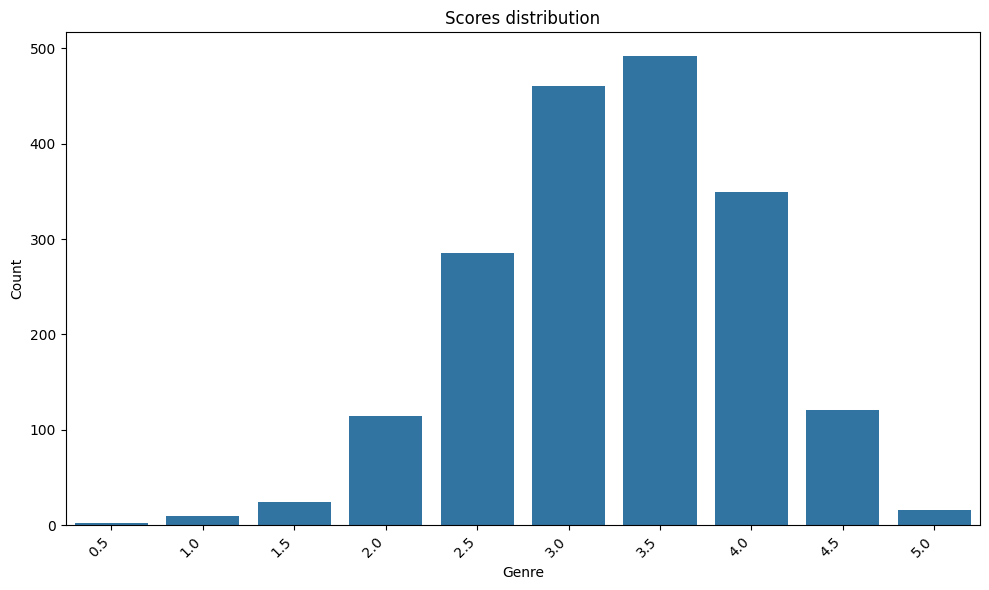

In [141]:
plt.figure(figsize=(10, 6))

# Barplot
sns.barplot(
    x=df_most_reviewed_bands['Score'].value_counts().index,
    y=df_most_reviewed_bands['Score'].value_counts().values
)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Scores distribution")

plt.tight_layout()
plt.show()

The bands reviewed at least 3 times present a slightly different distribution, with the most common score being 3.5 instead of 3.0

## Best/worst bands

In [142]:
# Mean scores per band reviewed at leat 3 times
mean_scores = df_most_reviewed_bands.groupby("Band")["Score"].mean().sort_values(ascending=False)

# Best bands
best_bands = mean_scores.iloc[:10]

# Worst bandas
worst_bands = mean_scores.iloc[-10:]

best_bands_df = best_bands.reset_index().rename(columns={"Score": "Average Score"})
worst_bands_df = worst_bands.sort_values(ascending=True).reset_index().rename(columns={"Score": "Average Score"})

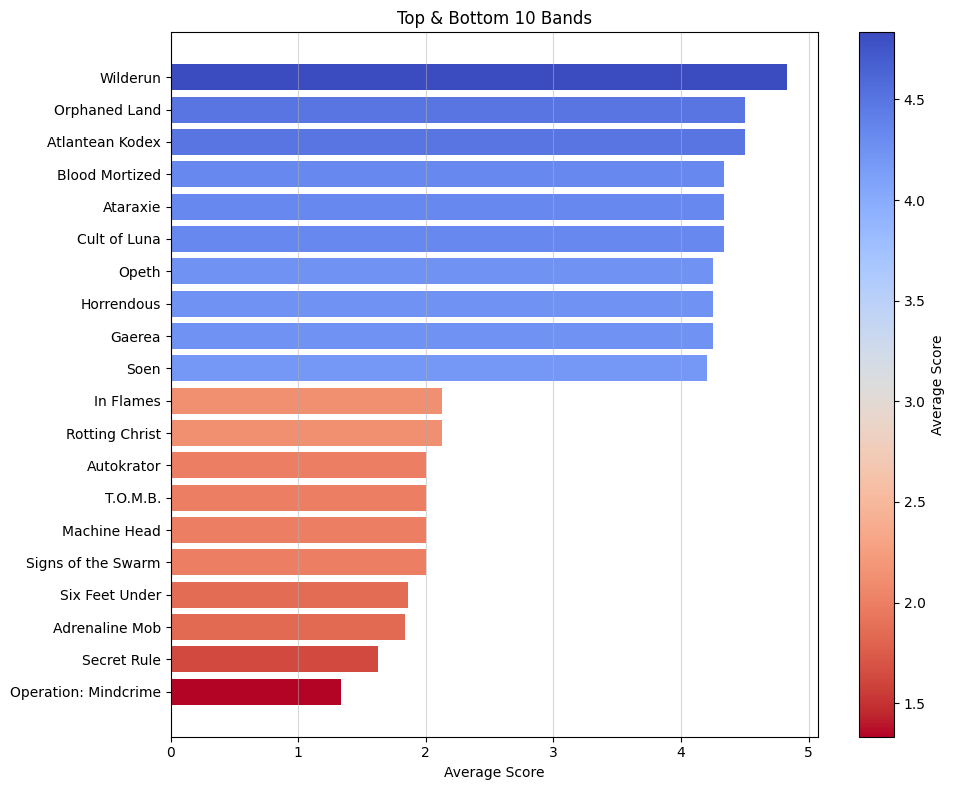

In [143]:
# Combine best and worst bands into one DataFrame
combined_bands = pd.concat([best_bands, worst_bands]).reset_index()
combined_bands.columns = ["Band", "Average Score"]

# Sort by score for better color mapping
combined_bands = combined_bands.sort_values("Average Score", ascending=False)

# Normalize colors based on score
norm = mpl.colors.Normalize(vmin=combined_bands["Average Score"].min(),
                            vmax=combined_bands["Average Score"].max())
cmap = mpl.cm.coolwarm.reversed()
colors = cmap(norm(combined_bands["Average Score"]))

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(combined_bands["Band"], combined_bands["Average Score"], color=colors)
ax.set_xlabel("Average Score")
ax.set_title("Top & Bottom 10 Bands")
ax.invert_yaxis()  # Highest score on top

# Create ScalarMappable for colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # needed for ScalarMappable
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Average Score")

plt.grid(alpha=.5, axis='x')
plt.tight_layout()
plt.show()